<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [311]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [312]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [313]:
df = pd.read_csv("DMV_Written_Tests.csv")

In [314]:
display(df.head())

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [315]:
display(df.head())
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_mean = X.mean()
X_std = X.std()
X = (X - X_mean) / X_std

display(X.head())

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


,DMV_Test_1,DMV_Test_2
0,-1.594216,0.635141
1,-1.817101,-1.201489
2,-1.531325,0.359483
3,-0.280687,1.080923
4,0.688062,0.490905


### Task 3: Visualize the Data
---

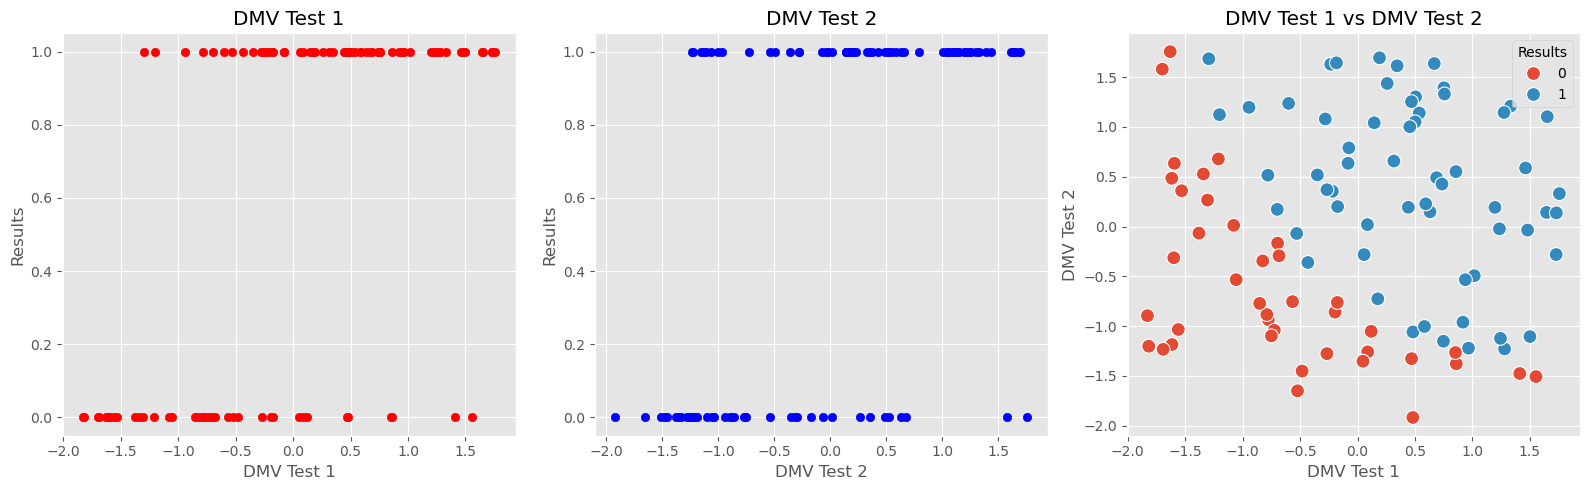

In [316]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
colour = ['red', 'blue']

for i in range(3):
    if i < 2:
        axes[i].scatter(X.iloc[:, i], y, label="DMV Test " + str(i+1), color=colour[i])
        axes[i].set_title("DMV Test " + str(i+1))
        axes[i].set_xlabel("DMV Test " + str(i+1))
        axes[i].set_ylabel("Results")
    else:
        sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, s=100, ax=axes[i])
        axes[i].set_title("DMV Test 1 vs DMV Test 2")
        axes[i].set_xlabel("DMV Test 1")
        axes[i].set_ylabel("DMV Test 2")

plt.tight_layout()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [317]:
def Sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [318]:
def CostFunction(X, y, theta):
    m = len(y)
    h = Sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def GradientFunction(X, y, theta):
    m = len(y)
    h = Sigmoid(X @ theta)
    grad = (1/m) * (X.T @ (h - y))
    return grad

### Task 6: Cost and Gradient at Initialization
---

In [319]:
X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
Theta = np.zeros(X_with_bias.shape[1])
Cost, Gradient = CostFunction(X_with_bias, y, Theta), GradientFunction(X_with_bias, y, Theta)
print("Cost (unregularized) :", Cost)
print("Grad shape:", Gradient.shape)
print("Grad:", Gradient)

Cost (unregularized) : 0.6931471805599453
Grad shape: (3,)
Grad: [-0.1        -0.27981946 -0.24972806]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [320]:
def GradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        cost = CostFunction(X, y, theta)
        cost_history.append(cost)
        gradient = GradientFunction(X, y, theta)
        theta = theta - alpha * gradient
        
    return theta, cost_history

In [321]:
initial_theta = np.zeros(X_with_bias.shape[1])
alpha = 0.001
iterations = 10000

optimized_theta, cost_history = GradientDescent(X_with_bias, y, initial_theta, alpha, iterations)

print("Optimized theta:", optimized_theta)
print("Final cost:", cost_history[-1])
print("Initial cost:", cost_history[0])

Optimized theta: [0.46644765 1.28567023 1.15281149]
Final cost: 0.31267163538726084
Initial cost: 0.6931471805599453


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

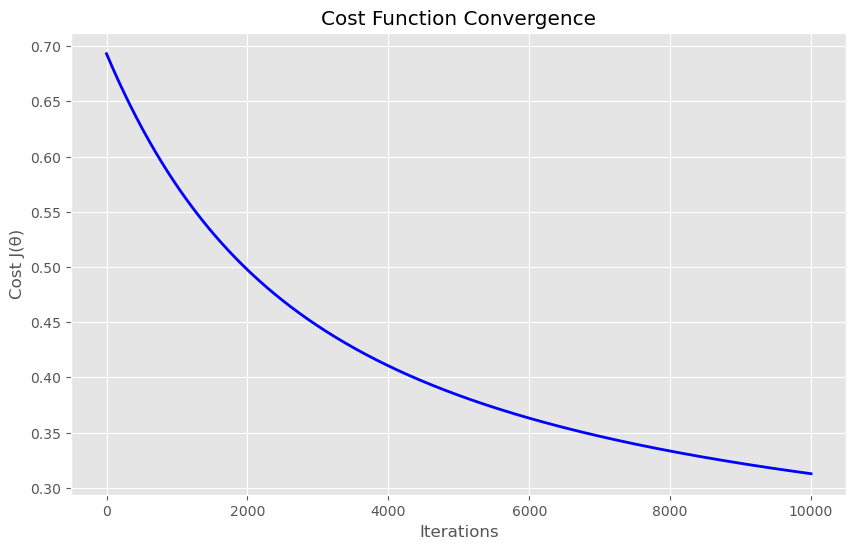

Initial cost: 0.693147
Final cost: 0.312672


In [322]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, 'b-', linewidth=2)
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.grid(True)
plt.show()

print(f"Initial cost: {cost_history[0]:.6f}")
print(f"Final cost: {cost_history[-1]:.6f}")

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

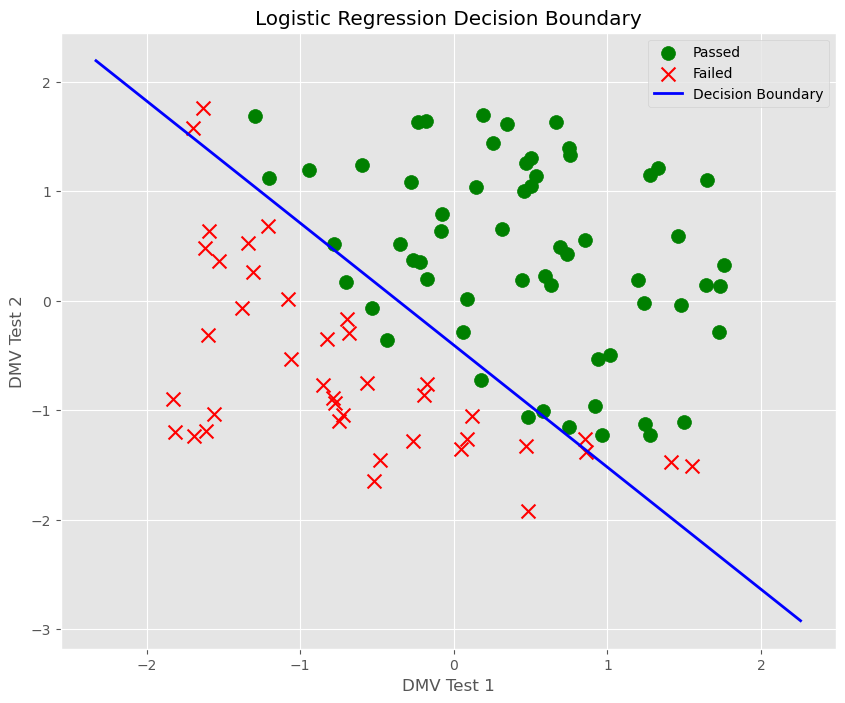

In [323]:
plt.figure(figsize=(10, 8))

passed = y == 1
failed = y == 0

plt.scatter(X[passed].iloc[:, 0], X[passed].iloc[:, 1], c='green', marker='o', s=100, label='Passed')
plt.scatter(X[failed].iloc[:, 0], X[failed].iloc[:, 1], c='red', marker='x', s=100, label='Failed')

if optimized_theta[2] != 0:
    x1_min, x1_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    x1_boundary = np.linspace(x1_min, x1_max, 100)
    x2_boundary = -(optimized_theta[0] + optimized_theta[1] * x1_boundary) / optimized_theta[2]
    
    plt.plot(x1_boundary, x2_boundary, 'b-', linewidth=2, label='Decision Boundary')

plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [324]:
def predict(X, theta):
    probabilities = Sigmoid(X @ theta)
    predictions = (probabilities >= 0.5)
    return predictions, probabilities

In [ ]:
predictions, probabilities = predict(X_with_bias, optimized_theta)
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

print("\10 predictions:")
print("Actual\tPredicted\tProbability")
for i in range(10):
    print(f"{y.iloc[i]}\t{predictions[i]}\t\t{probabilities[i]:.4f}")

Training Accuracy: 90.00%

First 10 predictions:
Actual	Predicted	Probability
0	False		0.2992
0	False		0.0372
0	False		0.2520
1	True		0.7944
1	True		0.8718
0	False		0.1814
1	True		0.8855
1	False		0.4666
1	True		0.9222
1	True		0.5745
